In [1]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from datetime import timedelta

import cmweather
import numpy as np
import pandas as pd
import xarray as xr
import glob

from bokeh.models.formatters import DatetimeTickFormatter
import hvplot.xarray
import holoviews as hv
hv.extension("bokeh")

import act
import pyart

warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



# Jan 25th - 30th 2022

In [42]:
# Set your username and token here!
username = 'hwebb98'
token = '27f4ff8845025d38'

# Set the datastream and start/enddates
datastream = 'gucaoppsap1flynn1hS2.c1'
startdate = '2022-01-25'
enddate = '2022-01-30'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds = act.io.read_arm_netcdf(result)

datastream = 'gucaoppsap1flynn1hS2.c1'
startdate = '2022-04-03'
enddate = '2022-04-08'

result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds2 = act.io.read_arm_netcdf(result)

datastream = 'gucaoppsap1flynn1hS2.c1'
startdate = '2022-01-02'
enddate = '2022-01-07'

result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds3 = act.io.read_arm_netcdf(result)

ds.clean.cleanup()
ds2.clean.cleanup()
ds3.clean.cleanup()

[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220125.003000.nc
[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220126.003000.nc
[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220127.003000.nc
[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220128.003000.nc
[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220129.003000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Flynn, C., Shilling, J., & Flynn, C. Aerosol Optical Properties
(AOPPSAP1FLYNN1H). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1369241

[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220407.003000.nc
[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220403.003000.nc
[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220404.003000.nc
[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220405.003000.nc
[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220406.003000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Flynn, C., Shilling, J., & Flynn, C. Aerosol Optical Properties
(AOPPSAP1FLYNN1H). Atmospheric Radiation Meas

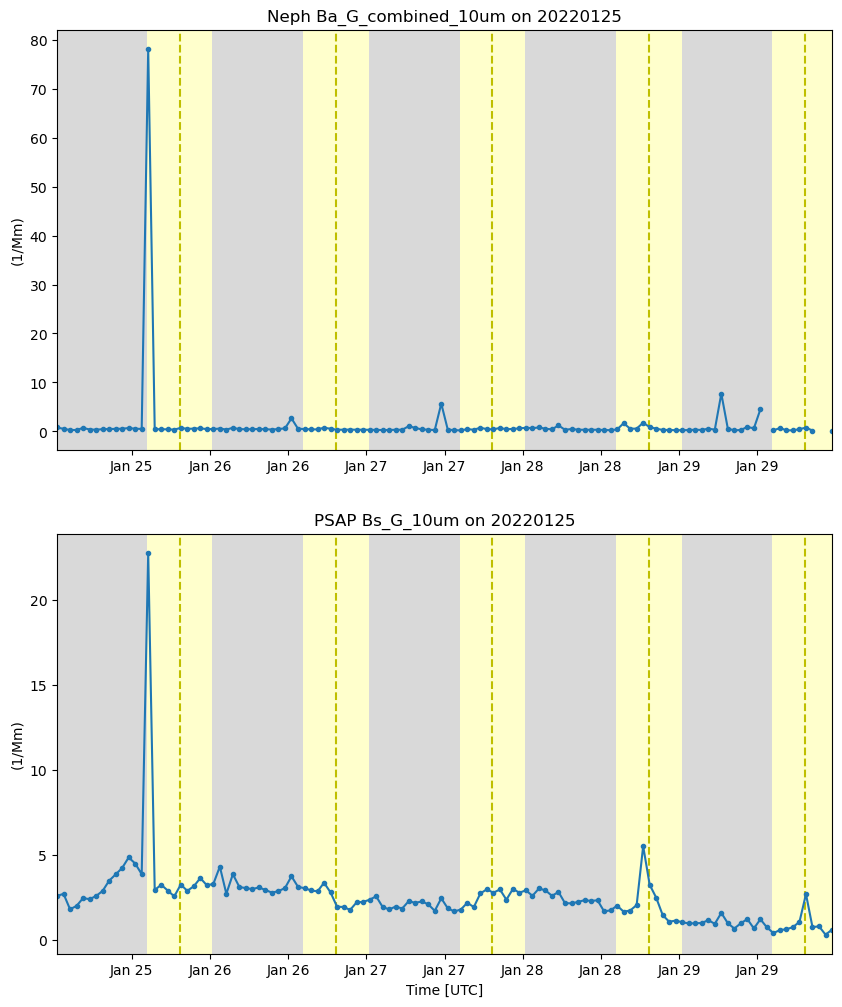

In [45]:

display = act.plotting.TimeSeriesDisplay({'PSAP': ds, 'Neph': ds},
                                         subplot_shape=(2,), figsize=(10,12))

# Plot up the variable in the first plot
display.plot('Ba_G_combined_10um', dsname='Neph', subplot_index=(0,))
display.day_night_background(dsname='Neph', subplot_index=(0,))

display.plot('Bs_G_10um',dsname='PSAP', subplot_index=(1,))
display.day_night_background(dsname='PSAP',subplot_index=(1,))

#display.plot('Ba_G_combined_10um', subplot_index=(0,))

# Plot up the QC variable in the second plot
#display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

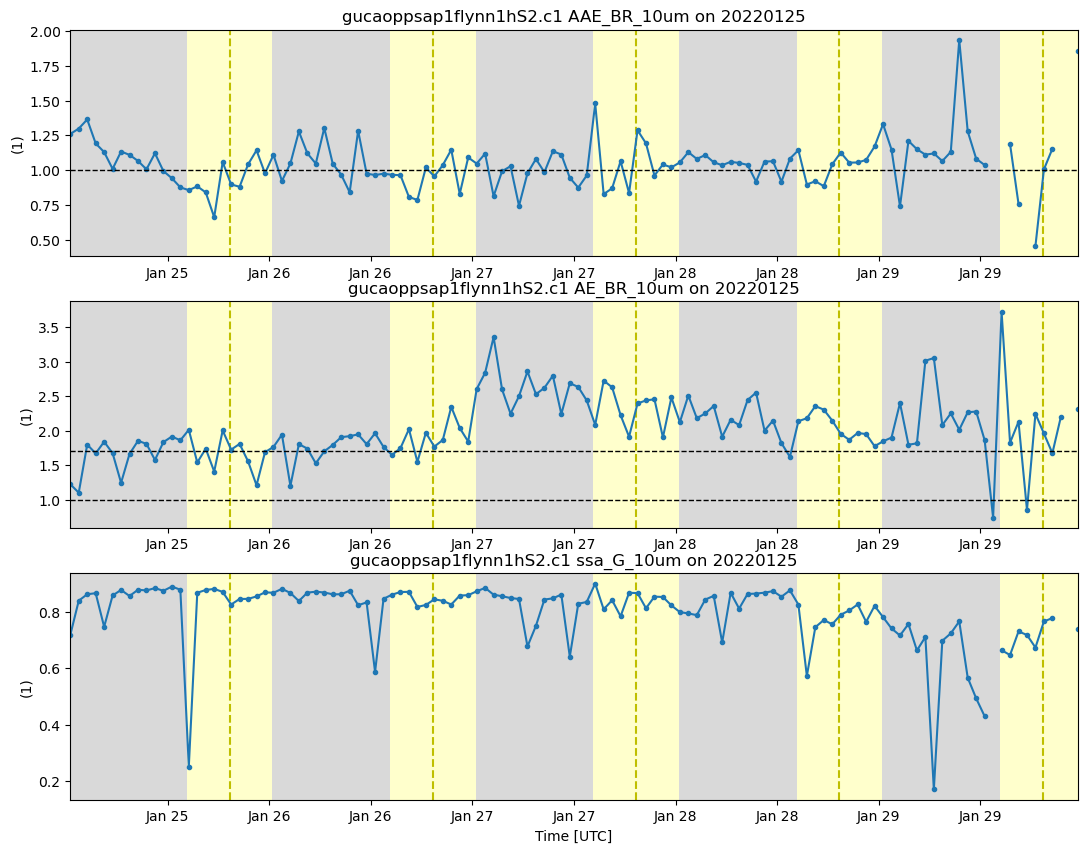

In [51]:
line = np.ones(24*5)
display = act.plotting.TimeSeriesDisplay(ds, figsize=(13, 10), subplot_shape=(3,))

display.plot('AAE_BR_10um', subplot_index=(0,))
display.axes[0].plot(ds['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(0,))

display.plot('AE_BR_10um', subplot_index=(1,))
display.axes[1].plot(ds['time'], line *1.7, 'k', linewidth=1, linestyle='--')
display.axes[1].plot(ds['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(1,))

display.plot('ssa_G_10um', subplot_index=(2,))
display.day_night_background(subplot_index=(2,))


# April 3rd - 8th 2022

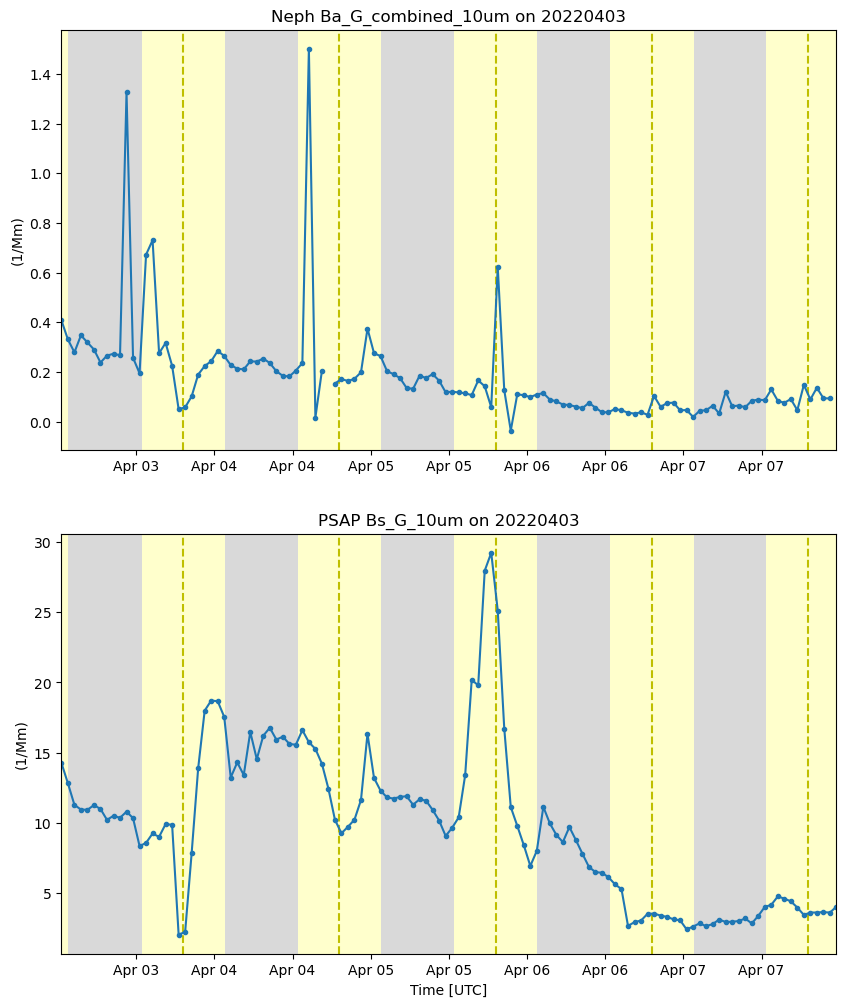

In [49]:
display = act.plotting.TimeSeriesDisplay({'PSAP': ds2, 'Neph': ds2},
                                         subplot_shape=(2,), figsize=(10,12))

display.plot('Ba_G_combined_10um', dsname='Neph', subplot_index=(0,))
display.day_night_background(dsname='Neph', subplot_index=(0,))

display.plot('Bs_G_10um',dsname='PSAP', subplot_index=(1,))
display.day_night_background(dsname='PSAP',subplot_index=(1,))

plt.show()

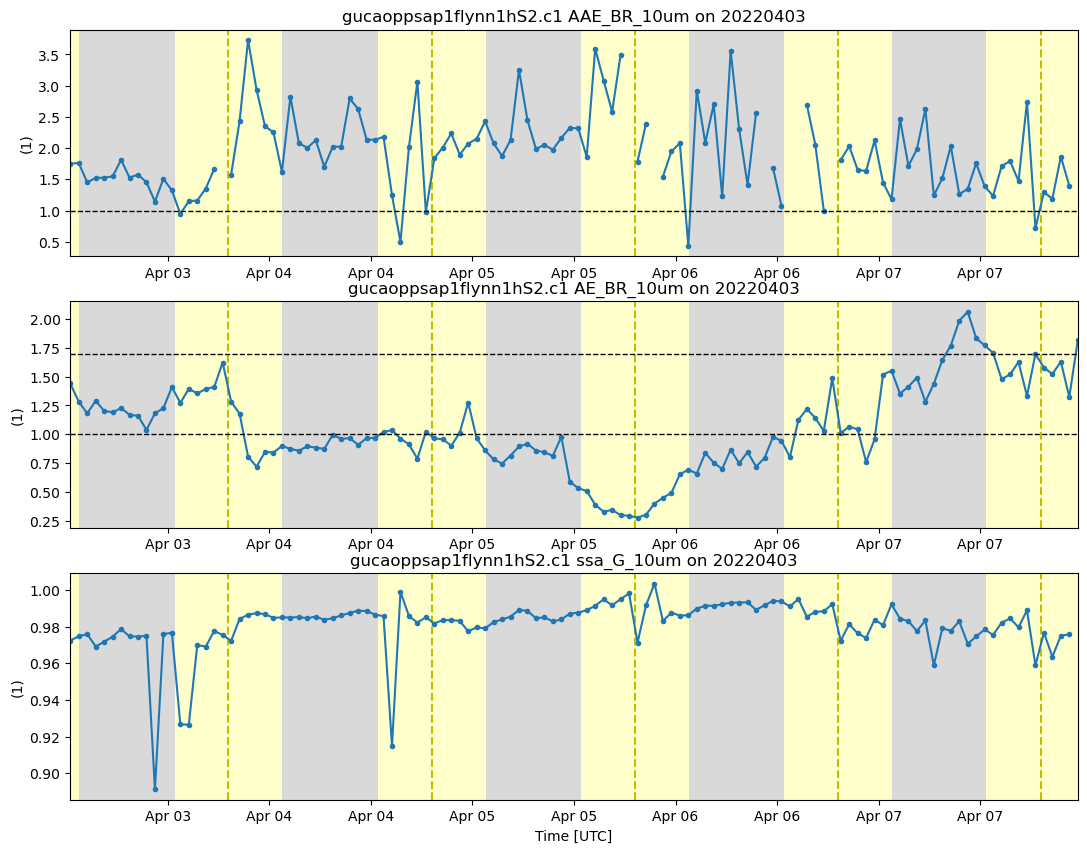

In [50]:
line = np.ones(24*5)
display = act.plotting.TimeSeriesDisplay(ds2, figsize=(13, 10), subplot_shape=(3,))

display.plot('AAE_BR_10um', subplot_index=(0,))
display.axes[0].plot(ds2['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(0,))

display.plot('AE_BR_10um', subplot_index=(1,))
display.axes[1].plot(ds2['time'], line *1.7, 'k', linewidth=1, linestyle='--')
display.axes[1].plot(ds2['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(1,))

display.plot('ssa_G_10um', subplot_index=(2,))
display.day_night_background(subplot_index=(2,))

# Jan 2nd - 7th 2022

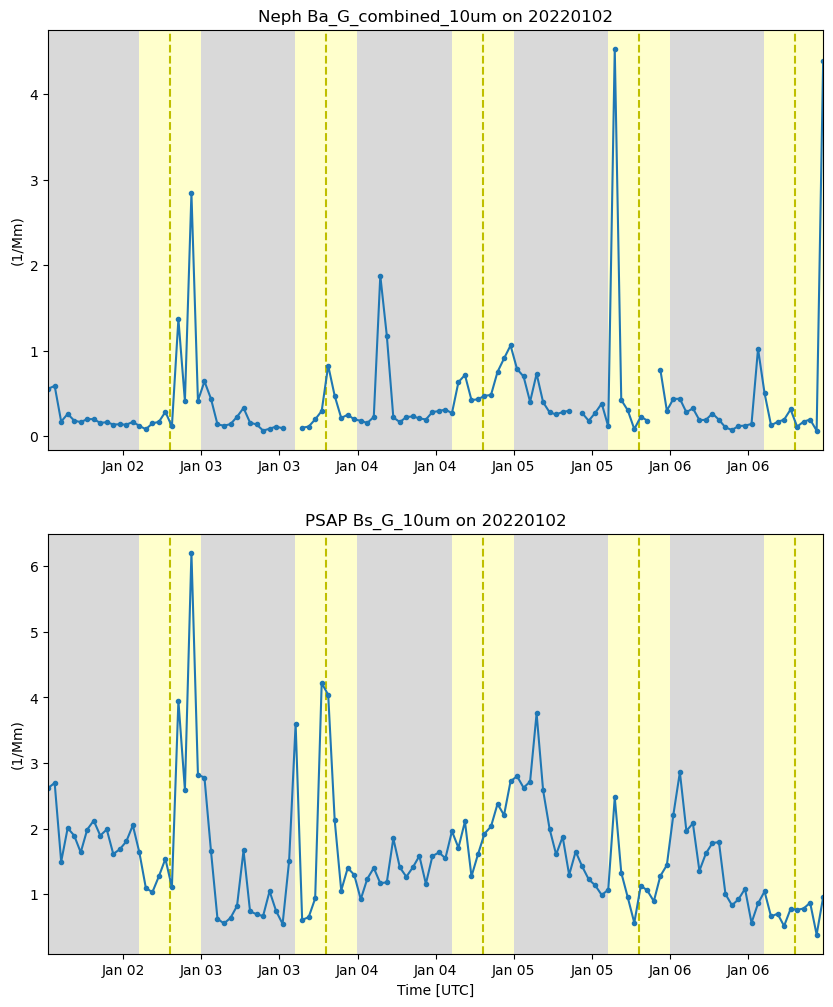

In [52]:
display = act.plotting.TimeSeriesDisplay({'PSAP': ds3, 'Neph': ds3},
                                         subplot_shape=(2,), figsize=(10,12))

display.plot('Ba_G_combined_10um', dsname='Neph', subplot_index=(0,))
display.day_night_background(dsname='Neph', subplot_index=(0,))

display.plot('Bs_G_10um',dsname='PSAP', subplot_index=(1,))
display.day_night_background(dsname='PSAP',subplot_index=(1,))

plt.show()

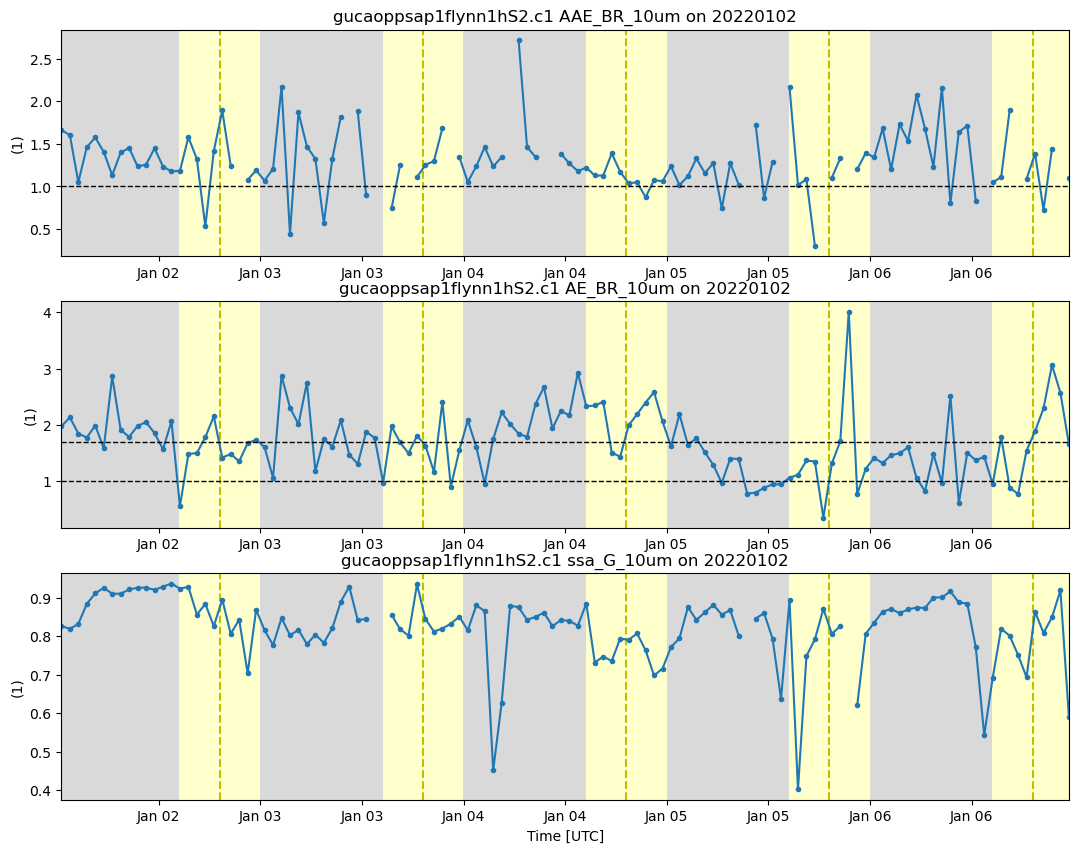

In [53]:
line = np.ones(24*5)
display = act.plotting.TimeSeriesDisplay(ds3, figsize=(13, 10), subplot_shape=(3,))

display.plot('AAE_BR_10um', subplot_index=(0,))
display.axes[0].plot(ds3['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(0,))

display.plot('AE_BR_10um', subplot_index=(1,))
display.axes[1].plot(ds3['time'], line *1.7, 'k', linewidth=1, linestyle='--')
display.axes[1].plot(ds3['time'], line, 'k', linewidth=1, linestyle='--')
display.day_night_background(subplot_index=(1,))

display.plot('ssa_G_10um', subplot_index=(2,))
display.day_night_background(subplot_index=(2,))